# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
state_edu = pd.read_csv('/Users/mary/Desktop/mdst/Onboarding/data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [12]:
state_edu.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Reading 

How many years of data are logged in our dataset? 33 years

In [8]:
len(state_edu['YEAR'].unique())

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose? Ohio

In [24]:
state_edu
mich_edu = state_edu[state_edu['STATE'] == 'MICHIGAN']
ohio_edu = state_edu[state_edu['STATE'] == 'OHIO']
mich_avg = mich_edu['AVG_READING_4_SCORE'].mean()
ohio_avg = ohio_edu['AVG_READING_4_SCORE'].mean()
print('mich: ', mich_avg)
print('ohio: ', ohio_avg)

mich:  217.83333333333334
ohio:  223.1818181818182


Find the average for your chosen test across all states in 2019.
The average grade 4 reading score across all states in 2019 is 219.79.

In [38]:
edu_2019 = state_edu[state_edu['YEAR'] == 2019]
avg_2019 = edu_2019['AVG_READING_4_SCORE'].mean()
print('avg 2019 score: ', avg_2019)

avg 2019 score:  219.79245283018867


For each state, find a maximum value for your chosen test score

In [40]:
max_per_state = state_edu.groupby('STATE')['AVG_READING_4_SCORE'].max()
max_per_state

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [48]:
state_edu['instruction_prop'] = (state_edu['INSTRUCTION_EXPENDITURE'] / state_edu['TOTAL_EXPENDITURE'])
state_edu['state_rev_prop'] = (state_edu['STATE_REVENUE'] / state_edu['TOTAL_REVENUE'])

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,instruction_prop,state_rev_prop
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0.558333,0.619298
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,0.422130,0.420436
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,0.553248,0.560051
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,0.529091,0.630103
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,0.503079,0.410648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN,NaN


Feature engineering justification: I decided to inspect the total expenditure and the intruction expenditure to look into the impacts that focusing more on education has on mean grades overall for grade 4 reading. I decided to use instruction expenditure alone and it's more clear that lower scores reside where the lower expenditures are.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

The correlation between the average reading grades and the proportion of instruction expenditure to total expenditure is pretty weak. It seems that as grades increase, the relation seems to get weaker.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

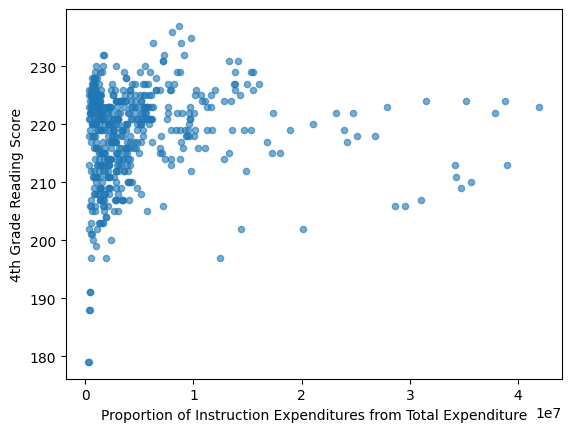

In [165]:
state_edu.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Proportion of Instruction Expenditures from Total Expenditure')
plt.ylabel('4th Grade Reading Score')

A scatterplot visualizing the relation between the proportion of instruction expenditures from total expenditure and 4th grade reading scores.

**Visualization 2**

Text(0, 0.5, '8th Grade Reading Score')

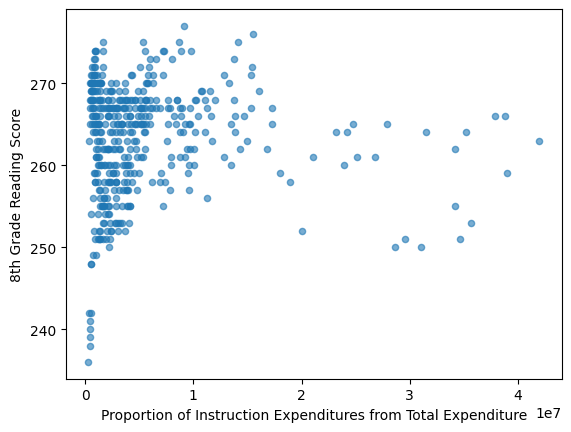

In [164]:
state_edu.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_READING_8_SCORE', alpha=0.6)
plt.xlabel('Proportion of Instruction Expenditures from Total Expenditure')
plt.ylabel('8th Grade Reading Score')

A scatterplot visualizing the relation between the proportion of instruction expenditures from total expenditure and 8th grade reading scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [136]:
from sklearn.model_selection import train_test_split

In [147]:
X = state_edu[['INSTRUCTION_EXPENDITURE','AVG_READING_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = state_edu.loc[X.index]['AVG_READING_4_SCORE']


In [148]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [155]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [156]:
# create your model here
model = LinearRegression()
model = Lasso(alpha=0.1)

In [157]:
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [158]:
y_pred = model.predict(X_test)


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [159]:
model.score(X_test, y_test)
mean_error = np.mean(y_pred - y_test)
print(f'Mean Error: {mean_error}')

# np.mean(model.predict(X_test)-y_test)
# np.mean(np.abs(model.predict(X_test)-y_test))
# np.mean((model.predict(X_test)-y_test)**2)**0.5

Mean Error: -0.0004822396719459578


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

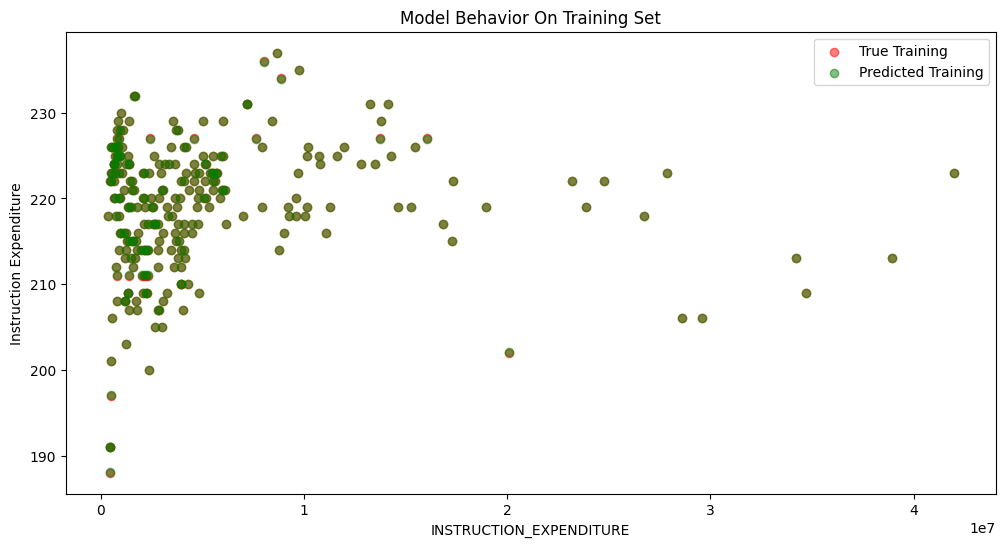

In [160]:

col_name = 'INSTRUCTION_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red", alpha=0.5)
plt.scatter(X_train[col_name], model.predict(X_train), color = "green", alpha=0.5)

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Instruction Expenditure')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

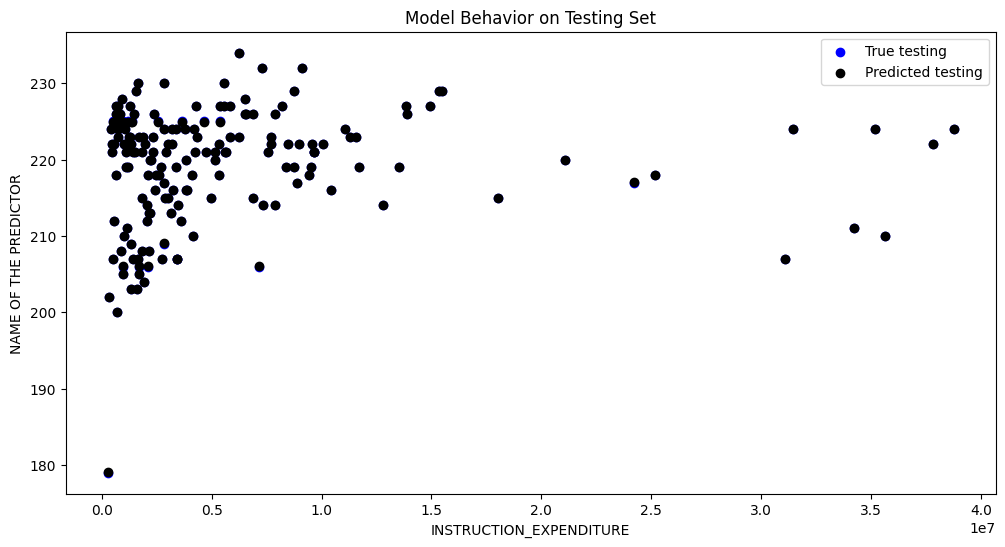

In [163]:
col_name = 'INSTRUCTION_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")